# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Lists to hold data frame variables
temp_max = []
humidity = []
clouds = []
latitude = []
longitude = []
wind_speed = []
city_name = []
country = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=800)
lngs = np.random.uniform(low=-180.000, high=180.000, size=800)
lat_lngs = zip(lats, lngs)
print(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
        city = city.replace(' ','%20')
        query_url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + api_key + "&units=imperial"
        print(query_url)
        
        response = requests.get(f'{query_url}').json()
        response

        temp_max.append(response['main']['temp_max'])
        temp

        humidity.append(response['main']['humidity'])
        humidity

        clouds.append(response['clouds']['all'])
        clouds

        wind_speed.append(response['wind']['speed'])
        wind_speed
        
        latitude.append(response['coord']['lat'])
        latitude
        
        longitude.append(response['coord']['lon'])
        longitude
        
        city_name.append(response['name'])
        city
        
        country.append(response['sys']['country'])
        country

        
        time.sleep(2.01)
        
# Print the city count to confirm sufficient count
#len(cities)

[ 8.49328287e+01  6.48178040e+01  4.50305644e+01 -7.76937532e+00
 -6.49704264e+01  6.42373826e+01  6.54363372e+01  1.16181428e+01
  8.05299741e+01  6.96625202e+01 -7.64185122e+01  2.95294198e+01
  3.92166988e+01 -7.85595924e+01  6.24050064e+01  5.75894561e+01
 -5.12065149e+01 -3.36996427e+01 -2.82816230e+01  8.32324420e+00
 -8.70120360e+01  3.57051090e+01  4.05184093e+00 -8.02682605e+01
 -3.71916992e+00 -3.68630455e+01  1.16399369e+01 -8.15985005e+01
 -4.95159496e+01  8.67268887e+01 -1.46309168e+01 -6.79417443e+01
 -5.63578248e+01 -5.61200512e+01 -6.49634057e+01 -1.52640732e+01
  5.55969342e+01  8.66156520e+01 -3.22375524e+01  9.25002109e+00
 -3.00562913e+00  5.57670118e+01 -3.06706708e+00  8.62586757e+01
 -8.91649960e+01 -7.30591668e+01 -6.51726512e+01 -6.79843026e+01
 -3.05459993e+01 -8.07219819e+01  4.52162351e+01 -1.43450741e+01
  1.42619720e+01 -2.10669679e+01 -6.96988035e+01 -7.07350645e+00
  2.03493684e+01  6.95465159e+01 -4.26332522e+01 -5.05273603e+01
 -6.62483433e+01 -3.39276

http://api.openweathermap.org/data/2.5/weather?q=bethel&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=hami&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial
http://api.openweathermap.org/data/2.5/weather?q=asau&appid=07d7cfb49d3254841a44d88e77e93cf0&units=imperial


KeyError: 'main'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
### Convert Raw Data to DataFrame
weather_data = {'Max Temperature': temp_max, 'Humidity': humidity, 'Cloudiness': clouds, 'Wind Speed': wind_speed, 'City Name': city_name, 'Country': country, 'Latitude': latitude, 'Longitude': longitude}
weather_data_df = pd.DataFrame(weather_data)
weather_data_df.head()

#* Export the city data into a .csv.

#* Display the DataFrame

,Max Temperature,Humidity,Cloudiness,Wind Speed,City Name,Country,Latitude,Longitude
0,77.00,78,40,21.92,Arraial do Cabo,BR,-22.97,-42.02
1,50.00,42,20,9.17,Albany,US,42.65,-73.75
2,83.48,77,2,14.20,Butaritari,KI,3.07,172.79
3,-3.66,84,22,4.90,Tiksi,RU,71.64,128.87
4,57.00,43,1,4.70,Port Elizabeth,US,39.31,-74.98


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

No handles with labels found to put in legend.


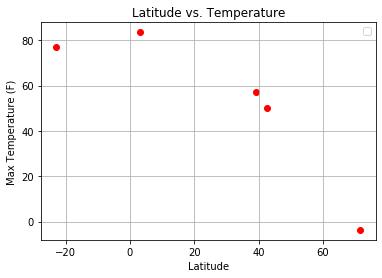

In [15]:
# Scatterplot 1
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temperature"], color = "r", marker="o")


plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Temperature")
plt.grid(True)

plt.show()
#plt.savefig("Latitude_vs_Temperature.png")

#### Latitude vs. Humidity Plot

No handles with labels found to put in legend.


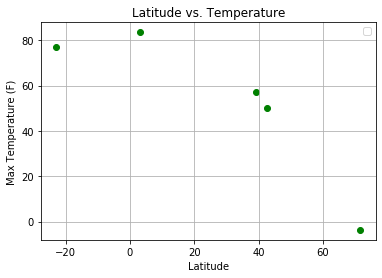

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temperature"], color = "g", marker="o")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Temperature")
plt.grid(True)

plt.show()
plt.savefig("lat_vs_hum.png")

#### Latitude vs. Cloudiness Plot

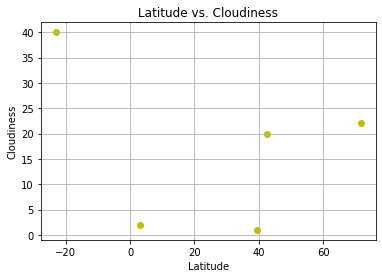

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], color = "y", marker="o")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.grid(True)

plt.show()
plt.savefig("lat_vs_cloud.png")

#### Latitude vs. Wind Speed Plot

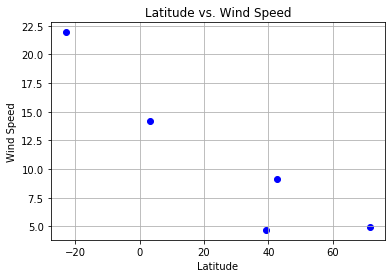

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], color = "b", marker="o")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.grid(True)

plt.show()
plt.savefig("lat_vs_wind.png")